[View in Colaboratory](https://colab.research.google.com/github/SnehJain/Comparative-Analysis-of-Conv1D-LSTM-with-CNN-LSTM-for-Stock-Price-Prediction/blob/master/TCS/TCS_Stock_Prediction_Using_Conv1D_LSTM.ipynb)

In [0]:
import quandl
import datetime

In [0]:
quandl.ApiConfig.api_key = "W2gL6N2N-DhBQeGxB3Ly"

In [0]:
df = quandl.get("NSE/TCS", start_date="2013-01-01", end_date="2018-05-18",)

In [4]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2013-01-01,1266.95,1267.9,1260.00,1262.30,1264.15,254790.0,3220.75
2013-01-02,1267.00,1272.4,1255.55,1262.95,1263.30,940123.0,11885.37
2013-01-03,1265.00,1284.0,1259.95,1282.90,1280.60,1317565.0,16821.01
2013-01-04,1285.00,1301.0,1280.90,1299.00,1299.20,2614380.0,33794.17
2013-01-07,1300.00,1304.0,1290.25,1295.00,1294.85,910376.0,11799.61


In [5]:
df.columns

Index(['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [0]:
df.drop(df.columns[[3,5,6]], axis=1, inplace=True)

In [7]:
df.head()

,Open,High,Low,Close
Date,,,,
2013-01-01,1266.95,1267.9,1260.00,1264.15
2013-01-02,1267.00,1272.4,1255.55,1263.30
2013-01-03,1265.00,1284.0,1259.95,1280.60
2013-01-04,1285.00,1301.0,1280.90,1299.20
2013-01-07,1300.00,1304.0,1290.25,1294.85


In [8]:
df['High'] = df['High'] / 10000
df['Open'] = df['Open'] / 10000
df['Low'] = df['Low'] / 10000
df['Close'] = df['Close'] / 10000
print(df.head())
print(df.tail())

                Open     High       Low     Close
Date                                             
2013-01-01  0.126695  0.12679  0.126000  0.126415
2013-01-02  0.126700  0.12724  0.125555  0.126330
2013-01-03  0.126500  0.12840  0.125995  0.128060
2013-01-04  0.128500  0.13010  0.128090  0.129920
2013-01-07  0.130000  0.13040  0.129025  0.129485
                Open      High       Low     Close
Date                                              
2018-05-14  0.345700  0.347100  0.341080  0.343355
2018-05-15  0.345000  0.349580  0.343370  0.348240
2018-05-16  0.347995  0.350900  0.347525  0.349390
2018-05-17  0.351295  0.353315  0.347600  0.349180
2018-05-18  0.348080  0.351770  0.345800  0.350205


In [0]:
data = df.as_matrix()

In [10]:
data

array([[0.126695, 0.12679 , 0.126   , 0.126415],
       [0.1267  , 0.12724 , 0.125555, 0.12633 ],
       [0.1265  , 0.1284  , 0.125995, 0.12806 ],
       ...,
       [0.347995, 0.3509  , 0.347525, 0.34939 ],
       [0.351295, 0.353315, 0.3476  , 0.34918 ],
       [0.34808 , 0.35177 , 0.3458  , 0.350205]])

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

In [12]:
result = []
sequence_length = 6
for index in range(len(data) - sequence_length):
    result.append(data[index: index + sequence_length])
    
result = np.array(result)
row = round(0.8 * result.shape[0])

#creating training data
train = result[:int(row), :]

x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[int(row):, :-1]
y_test = result[int(row):, -1][:,-1]

amount_of_features = len(df.columns)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features)) 

print("X_train", x_train.shape)
print("y_train", y_train.shape)
print("X_test", x_test.shape)
print("y_test", y_test.shape)

X_train (1060, 5, 4)
y_train (1060,)
X_test (265, 5, 4)
y_test (265,)


In [0]:
from __future__ import print_function
import math
#importing keras modules
from keras.models import Sequential
from keras.layers import Dense, Activation ,Dropout , Flatten , Conv1D , MaxPooling1D
from keras.layers.recurrent import LSTM
from keras import losses
from keras import optimizers

In [0]:
def build_model(input):
    model = Sequential()
    model.add(Dense(128,input_shape=(input[1],input[0])))
    model.add(Conv1D(filters = 80, kernel_size= 1,padding='same', activation='relu', kernel_initializer="glorot_uniform"))
    model.add(MaxPooling1D(pool_size=2, padding='valid'))
    model.add(Conv1D(filters = 48,kernel_size = 1,padding='same', activation='relu', kernel_initializer="glorot_uniform"))
    model.add(MaxPooling1D(pool_size=2, padding='valid'))
    #model.add(Dropout(0.2))
    model.add(LSTM(32,return_sequences=True))
    model.add(LSTM(16,return_sequences=False))
    model.add(Dense(32, activation="relu", kernel_initializer="uniform"))
    model.add(Dense(1, activation="relu", kernel_initializer="uniform"))
    model.compile(loss='mse',optimizer='adam',metrics=['mae'])
    return model

In [41]:
model = build_model([4,5,1])
#Summary of the Model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 5, 128)            640       
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 5, 80)             10320     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 2, 80)             0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 2, 48)             3888      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 1, 48)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 32)             10368     
_________________________________________________________________
lstm_8 (LSTM)                (None, 16)                3136      
__________

In [42]:
from timeit import default_timer as timer
start = timer()
history = model.fit(x_train,
                    y_train,
                    batch_size=128,
                    epochs=35,
                    validation_split=0.2,
                    verbose=2)
end = timer()
print(end - start)

Train on 848 samples, validate on 212 samples
Epoch 1/35
 - 2s - loss: 0.0496 - mean_absolute_error: 0.2192 - val_loss: 0.0531 - val_mean_absolute_error: 0.2301
Epoch 2/35
 - 0s - loss: 0.0447 - mean_absolute_error: 0.2078 - val_loss: 0.0472 - val_mean_absolute_error: 0.2169
Epoch 3/35
 - 0s - loss: 0.0388 - mean_absolute_error: 0.1929 - val_loss: 0.0395 - val_mean_absolute_error: 0.1982
Epoch 4/35
 - 0s - loss: 0.0305 - mean_absolute_error: 0.1702 - val_loss: 0.0279 - val_mean_absolute_error: 0.1664
Epoch 5/35
 - 0s - loss: 0.0182 - mean_absolute_error: 0.1289 - val_loss: 0.0111 - val_mean_absolute_error: 0.1045
Epoch 6/35
 - 0s - loss: 0.0044 - mean_absolute_error: 0.0573 - val_loss: 1.5305e-04 - val_mean_absolute_error: 0.0099
Epoch 7/35
 - 0s - loss: 0.0029 - mean_absolute_error: 0.0433 - val_loss: 9.8754e-04 - val_mean_absolute_error: 0.0291
Epoch 8/35
 - 0s - loss: 0.0018 - mean_absolute_error: 0.0312 - val_loss: 5.8624e-04 - val_mean_absolute_error: 0.0212
Epoch 9/35
 - 0s - los

In [43]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

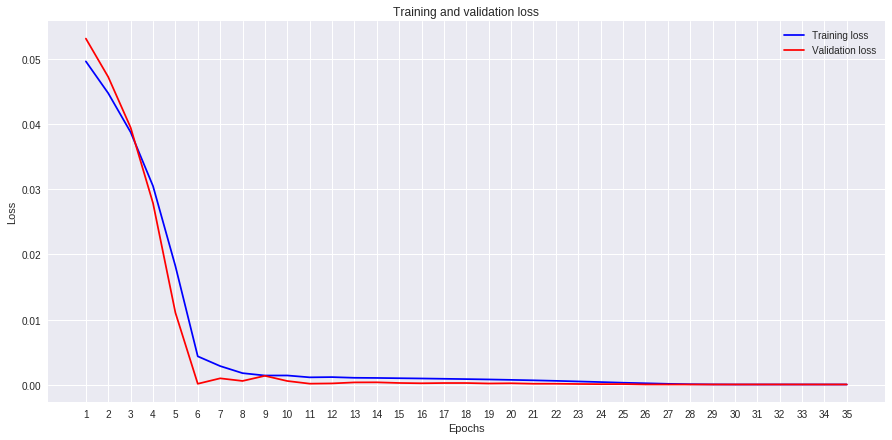

In [44]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
loss_values50 = loss_values[0:150]
val_loss_values50 = val_loss_values[0:150]
epochs = range(1, len(loss_values50) + 1)
plt.plot(epochs, loss_values50, 'b',color = 'blue', label='Training loss')
plt.plot(epochs, val_loss_values50, 'b',color='red', label='Validation loss')
plt.rc('font', size = 18)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/tcstest&validationlosscnn.png', dpi=300)
plt.show()

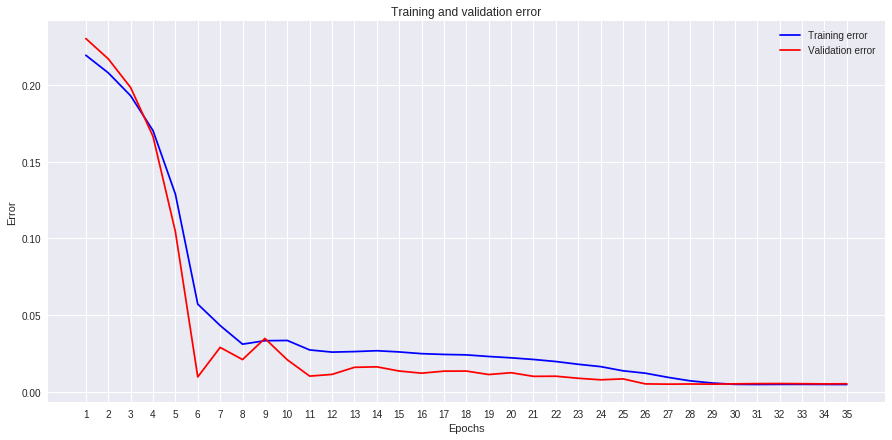

In [45]:
mae = history_dict['mean_absolute_error']
vmae = history_dict['val_mean_absolute_error']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'b',color = 'blue', label='Training error')
plt.plot(epochs, vmae, 'b',color='red', label='Validation error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/tcstest&validationerrorcnn.png', dpi=300)
plt.show()

In [46]:
model.metrics_names

['loss', 'mean_absolute_error']

In [0]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
testScore = model.evaluate(x_test, y_test, verbose=0)

In [0]:
#predicting values for y_test
p = model.predict(x_test)

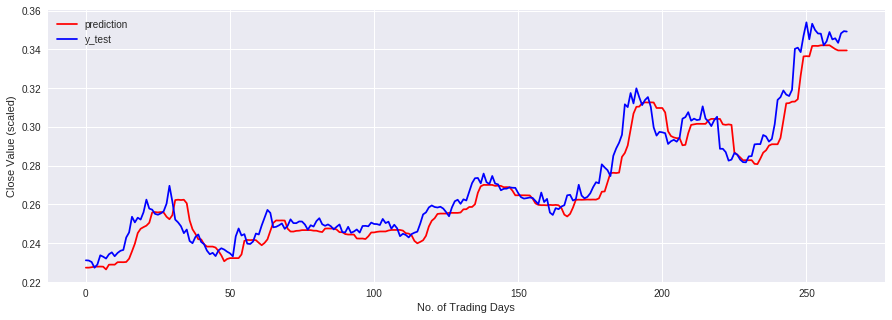

In [49]:
plt.plot(p,color='red', label='prediction')
plt.plot(y_test,color='blue', label='y_test')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15, 5)
#fig.savefig('img/tcstestcnn.png', dpi=300)
plt.show()

In [0]:
p1= model.predict(x_train)

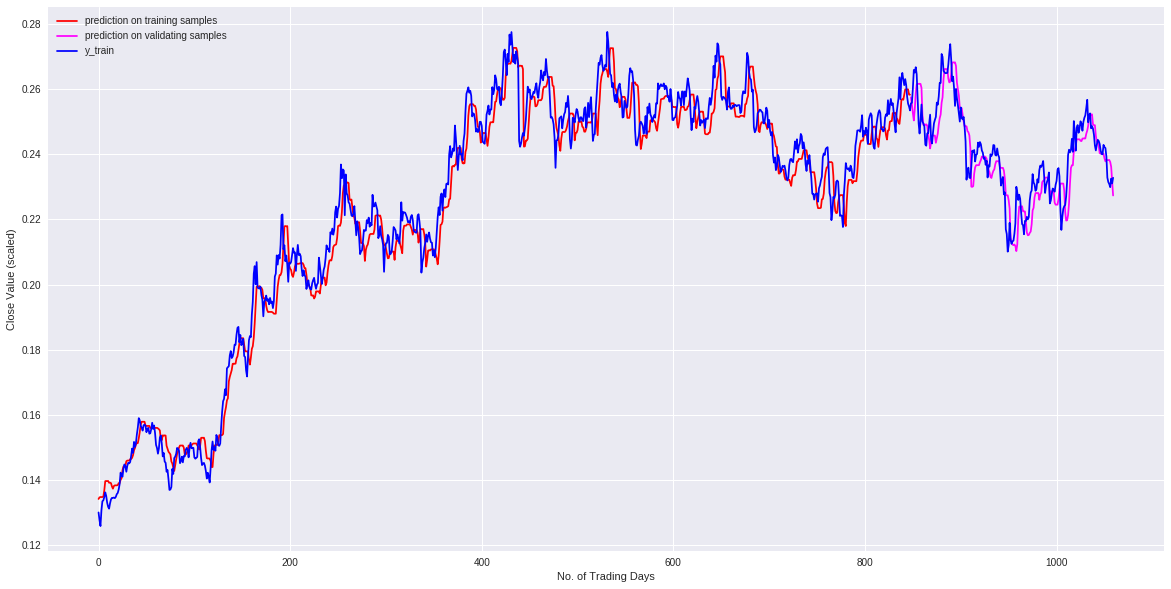

In [51]:
plt.plot(p1[:848],color='red', label='prediction on training samples')
x = np.array(range(848,1060))
plt.plot(x,p1[848:],color = 'magenta',label ='prediction on validating samples')
plt.plot(y_train,color='blue', label='y_train')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20,10)
#fig.savefig('img/tcstraincnn.png', dpi=300)
plt.show()

In [0]:
y = y_test * 10000
y_pred = p.reshape(265)
y_pred = y_pred * 10000

In [0]:
from sklearn.metrics import mean_absolute_error

In [54]:
print('Trainscore RMSE \tTrain Mean abs Error \tTestscore Rmse \t Test Mean abs Error')
print('%.9f \t\t %.9f \t\t %.9f \t\t %.9f' % (math.sqrt(trainScore[0]),trainScore[1],math.sqrt(testScore[0]),testScore[1]))

Trainscore RMSE 	Train Mean abs Error 	Testscore Rmse 	 Test Mean abs Error
0.006610713 		 0.005175606 		 0.007929825 		 0.005896978


In [55]:
print('mean absolute error \t mean absolute percentage error')
print(' %.9f \t\t\t %.9f' % (mean_absolute_error(y,y_pred),(np.mean(np.abs((y - y_pred) / y)) * 100)))

mean absolute error 	 mean absolute percentage error
 58.969797870 			 2.136428955


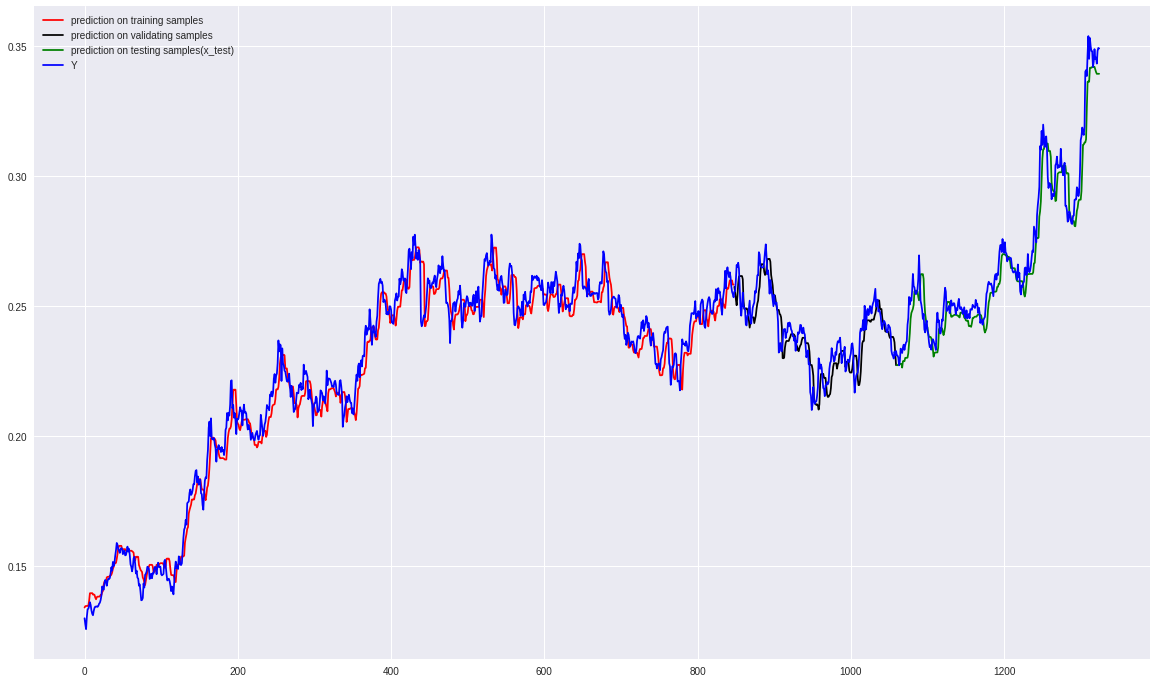

In [56]:
Y = np.concatenate((y_train,y_test),axis = 0)
P = np.concatenate((p1,p),axis = 0)
#plotting the complete Y set with predicted values on x_train and x_test(variable p1 & p respectively given above)
#for 
plt.plot(P[:848],color='red', label='prediction on training samples')
#for validating samples
z = np.array(range(848,1060))
plt.plot(z,P[848:1060],color = 'black',label ='prediction on validating samples')
#for testing samples
x = np.array(range(1060,1325))
plt.plot(x,P[1060:],color = 'green',label ='prediction on testing samples(x_test)')

plt.plot(Y,color='blue', label='Y')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20,12)
plt.show()